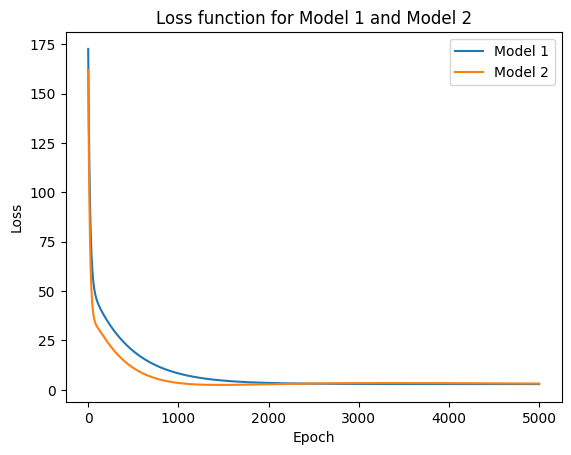

Final Loss for Model 1: 2.9282944202423096
Final Loss for Model 2: 3.190276861190796


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Normalize the input temperatures
t_u_normalized = [(t - min(t_u)) / (max(t_u) - min(t_u)) for t in t_u]

# Convert data to tensors
t_c = torch.tensor(t_c)
t_u_normalized = torch.tensor(t_u_normalized)

# Model 1
def model1(t_u, w, b):
    return w * t_u + b

# Model 2
def model2(t_u, w, b):
    return w[0] * t_u**2 + w[1] * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

# Initialize model parameters
w1 = torch.tensor(1.0, requires_grad=True)
w2 = torch.tensor(1.0, requires_grad=True)
w3 = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Set learning rate and number of epochs
lr = 1e-2
num_epochs = 5000

# Lists to store the losses
losses1 = []
losses2 = []

# Training loop
for epoch in range(num_epochs):
    # Generate predictions for model 1
    t_p1 = model1(t_u_normalized, w1, b)

    # Generate predictions for model 2
    t_p2 = model2(t_u_normalized, [w3, w2], b)

    # Calculate loss for model 1 and model 2
    loss1 = loss_fn(t_p1, t_c)
    loss2 = loss_fn(t_p2, t_c)

    # Store the losses
    losses1.append(loss1.item())
    losses2.append(loss2.item())

    # Check if loss is NaN
    if torch.isnan(loss1) or torch.isnan(loss2):
        print(f"Loss became NaN. Training stopped at epoch {epoch}.")
        break

    # Update model parameters using gradient descent
    loss1.backward()
    with torch.no_grad():
        w1 -= lr * w1.grad
        b -= lr * b.grad
        w1.grad.zero_()
        b.grad.zero_()

    loss2.backward()
    with torch.no_grad():
        w2 -= lr * w2.grad
        w3_new = w3 - lr * w3.grad
        w3.copy_(w3_new)
        w2.grad.zero_()
        w3.grad.zero_()
        b.grad.zero_()

# Plot the loss function for both models
plt.plot(range(len(losses1)), losses1, label='Model 1')
plt.plot(range(len(losses2)), losses2, label='Model 2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function for Model 1 and Model 2')
plt.show()

print(f"Final Loss for Model 1: {losses1[-1]}")
print(f"Final Loss for Model 2: {losses2[-1]}")
